**Name-Surname:** Gianpietro Nicoletti <br>
**ID**: 2053042

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import math as mt
from scipy import linalg as la

In [2]:
BOLD = "\033[1m"
END = "\033[0m"

In [3]:
#do you need to create the folder and download the files?
DOWNLOAD_FILE = False

In [4]:
if(DOWNLOAD_FILE):
    !mkdir data/ #creating an empty folder

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [5]:
#generation of the dataset: notice that the columns have 0 mean 
n = 1500
x1 = np.random.normal(0,1,n) #std1 = 1
x2 = x1 + np.random.normal(0,3,n) #std2 = sqrt(1**2 + 3**2) = sqrt(10)
x3 = 2*x1+x2 #std3 = std2**2  + std1**2 = (1**2 + 3**2) + 1**2 = sqrt(11)

df = pd.DataFrame({"x1":x1, "x2":x2, "x3": x3})

print(BOLD+"Dataset:"+END)
df

Dataset:


,x1,x2,x3
0,0.331147,0.274018,0.936312
1,-0.483068,-1.163358,-2.129493
2,0.144808,-2.174324,-1.884708
3,-0.106594,0.617514,0.404326
4,-1.358054,3.393564,0.677456
...,...,...,...
1495,0.658703,-3.493747,-2.176340
1496,-0.579088,-6.955811,-8.113987
1497,0.566078,3.203318,4.335474
1498,-1.976568,-3.478647,-7.431784


In [6]:
#eigengvectors and values using covariance matrix
cov = np.cov(df.T)
evalues1, evectors1 = la.eig(cov)
evalues1 = np.real_if_close(evalues1)

#eigengvectors and values using SVD
U, D, Vt = la.svd(df.T)
evectors2 = U
evalues2 = D**2/(n-1)


print(BOLD+"-Are the eigen values the same for the two methods? \n\n"+END,evalues1,"\n\n",evalues2)
print(BOLD+"\n\n-Are the eigen vectors the same for the two methods?\n\n "+END,evectors1,"\n\n",evectors2)

#they are not perfeclty the same but the results are quite similar

-Are the eigen values the same for the two methods? 

 [ 2.63374492e+01 -5.60574241e-16  1.98100592e+00] 

 [2.63376740e+01 1.98251684e+00 2.50439324e-30]


-Are the eigen vectors the same for the two methods?

  [[-0.11557676 -0.81649658  0.56566363]
 [-0.57721688 -0.40824829 -0.70721568]
 [-0.80837039  0.40824829  0.42411159]] 

 [[-0.11556322  0.5656664  -0.81649658]
 [-0.5772338  -0.70720186 -0.40824829]
 [-0.80836024  0.42413094  0.40824829]]


In [7]:
#check the variability for each eigenvector
totsum = evalues1.sum()
i=0
for e in evalues1:
    print("Variance for eigenvector of index "+str(i)+" is: "+END+str(e/totsum*100))
    i+=1
    
#so i need to take 2 eigenvectors to mantain at least 99% of the variance   
indexes = np.flip(np.argpartition(evalues1, 2)) #indexes in increasing order of eigenvalues

W = evectors1[:,indexes[0:2]] #selecting the 2 eigenvectors associated with the 2 biggest eigenvalues
print(BOLD+"\n\nSelected eigenvectors:\n"+END)

print(W)

Variance for eigenvector of index 0 is: 93.00454099089785
Variance for eigenvector of index 1 is: -1.979536805798462e-15
Variance for eigenvector of index 2 is: 6.995459009102145


Selected eigenvectors:

[[-0.11557676  0.56566363]
 [-0.57721688 -0.70721568]
 [-0.80837039  0.42411159]]


In [8]:
#reducing data with the pca definition Y = W*X 
reduced_data = np.matmul(df.values,W)


df_reduced = pd.DataFrame({"f1":reduced_data[:,0],"f2": reduced_data[:,1]})

print(BOLD+"Redefine data:"+END)

df_reduced
                          
                

Redefine data:


,f1,f2
0,-0.953328,0.390629
1,2.448760,-0.353652
2,2.761862,0.820302
3,-0.670965,-0.325532
4,-2.349498,-2.880867
...,...,...
1495,3.699807,1.920426
1496,10.641048,1.150453
1497,-5.419104,-0.106502
1498,8.244013,-1.809825


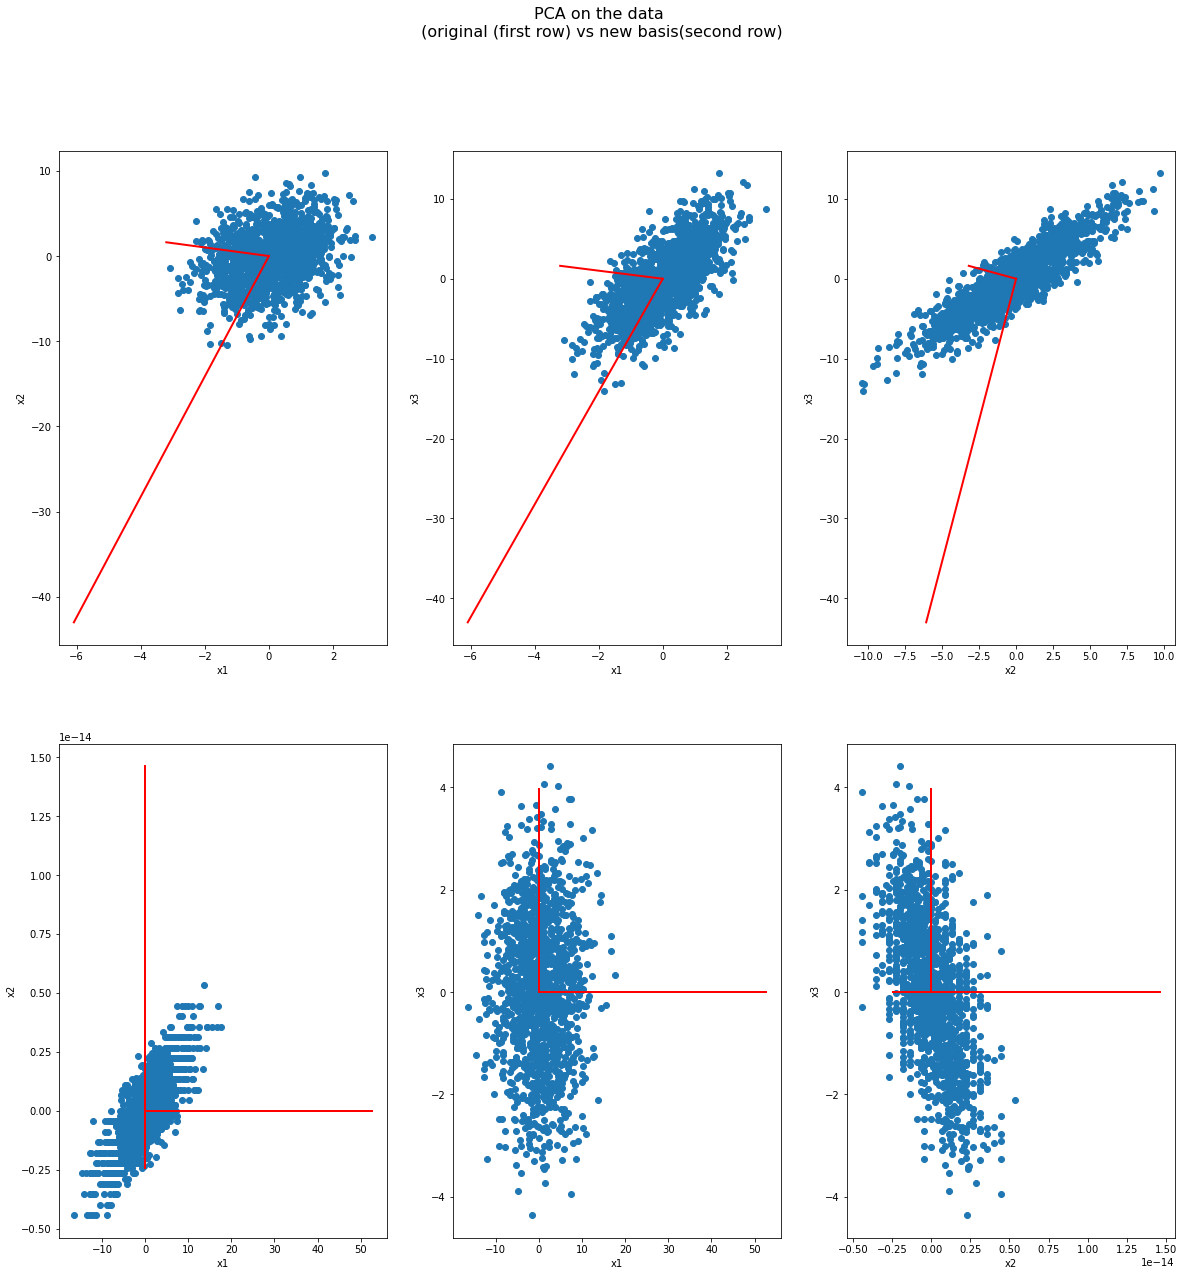

In [9]:
new_data = np.dot(evectors1.T, df.values.T).T #rotating the data

figure, axs = plt.subplots(2,3,figsize=(20,20))
scale_factor = 2

figure.suptitle("PCA on the data\n (original (first row) vs new basis(second row)", fontsize=16)

#original data(first row)
i=0 #used for the label and the position in the figure
for couple in ((x1,x2,1,2),(x1,x3,1,3),(x2,x3,2,3)): #all possible combination, the last 2 element are for the
    axs[0][i].scatter(couple[0], couple[1])          #the axis labels
    axs[0][i].set_xlabel("x"+str(couple[2]))
    axs[0][i].set_ylabel("x"+str(couple[3]))
    
    for li, vi in zip(evalues1, evectors1):
        
        axs[0][i].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], "r-", lw=2)
        
    i+=1

#rotated data(second row), same comments as above 
i=0
for couple in ((new_data[:,0],new_data[:,1],1,2),(new_data[:,0],new_data[:,2],1,3),(new_data[:,1],new_data[:,2],2,3)):
    axs[1][i].scatter(couple[0], couple[1])
    axs[1][i].set_xlabel("x"+str(couple[2]))
    axs[1][i].set_ylabel("x"+str(couple[3]))
    
    
    for li, vi in zip(evalues1, np.dot(evectors1.T, evectors1)):
        
        #the vectors in this case rappresent the cartesian axis
        axs[1][i].plot([0,scale_factor*li*vi[couple[2]-1]], [0,0], "r-", lw=2)
        axs[1][i].plot([0,0], [0,scale_factor*li*vi[couple[3]-1]], "r-", lw=2)
    i+=1

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [10]:
sigma = mt.sqrt(10)


#adding different noise to each column of the dataset with a different sigma each time (with scale factor >=20)
for i in range(10):
    df["noise"+str(i)]= np.random.normal(0,sigma/np.random.randint(low=20, high=30),n)


df

,x1,x2,x3,noise0,noise1,noise2,noise3,noise4,noise5,noise6,noise7,noise8,noise9
0,0.331147,0.274018,0.936312,0.211368,-0.000800,-0.121852,0.036677,0.001855,0.033622,0.171085,-0.112043,-0.226488,-0.122934
1,-0.483068,-1.163358,-2.129493,0.114878,-0.203154,-0.109831,-0.323684,-0.011160,0.081582,-0.243194,0.034774,0.202032,0.003569
2,0.144808,-2.174324,-1.884708,0.053225,0.185891,0.040776,0.144229,0.065223,0.002425,-0.143649,0.020302,-0.068761,0.015295
3,-0.106594,0.617514,0.404326,-0.050873,-0.165787,0.087992,0.104439,0.196381,0.069703,-0.006680,0.199357,0.260789,-0.059967
4,-1.358054,3.393564,0.677456,0.091343,-0.066140,0.157901,-0.035032,-0.000667,0.063459,0.151501,-0.512827,0.180465,-0.141537
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.658703,-3.493747,-2.176340,-0.047754,-0.207586,-0.008789,0.006169,0.032272,-0.309918,0.201416,-0.010033,-0.017859,0.159584
1496,-0.579088,-6.955811,-8.113987,-0.101051,0.152600,-0.178731,0.027709,-0.083421,0.037984,0.134246,-0.105893,0.181537,-0.026228
1497,0.566078,3.203318,4.335474,-0.099501,0.190088,0.124238,-0.161452,-0.047932,0.139163,-0.075442,-0.026224,-0.110362,-0.177069
1498,-1.976568,-3.478647,-7.431784,-0.266615,-0.240636,0.084581,0.174304,-0.032889,0.019219,-0.130746,0.097529,-0.021933,-0.017633


In [11]:
#the follow passages are the same of the previous exercise:

#eigengvectors and values using covariance matrix
cov = np.cov(df.T)
evalues, evectors = la.eig(cov)
evalues = np.real_if_close(evalues)

#check the variability for each eigenvector
totsum = evalues.sum()
i=0
for e in evalues:
    print("Variance for eigenvector of index "+str(i)+" is: "+END+str(e/totsum*100))
    i+=1
    
#so i need to take 2 eigenvectors to mantain at least 99% of the variance   
indexes = np.flip(np.argpartition(evalues, 2)) #indexes in increasing order of eigenvalues

W = evectors[:,indexes[0:2]] #selecting the 2 eigenvectors associated with the 2 biggest eigenvalues
print(BOLD+"\n\nSelected eigenvectors:\n"+END)

print(W)

Variance for eigenvector of index 0 is: 92.36221914287327
Variance for eigenvector of index 1 is: 6.947610220411861
Variance for eigenvector of index 2 is: -1.6398934021515497e-14
Variance for eigenvector of index 3 is: 0.09088901687946135
Variance for eigenvector of index 4 is: 0.08910945726501607
Variance for eigenvector of index 5 is: 0.08293404340963383
Variance for eigenvector of index 6 is: 0.07343764477781921
Variance for eigenvector of index 7 is: 0.07068195736381405
Variance for eigenvector of index 8 is: 0.06820861117334143
Variance for eigenvector of index 9 is: 0.06040371448877976
Variance for eigenvector of index 10 is: 0.04939609399558212
Variance for eigenvector of index 11 is: 0.0530170247293983
Variance for eigenvector of index 12 is: 0.05209307263201896


Selected eigenvectors:

[[-1.15576233e-01  1.08369132e-03]
 [-5.77215380e-01 -1.43147670e-03]
 [-8.08367845e-01  7.35905943e-04]
 [-6.31516470e-04  2.67475524e-02]
 [ 1.27463644e-03 -2.44246128e-02]
 [ 6.71057879e-04

In [12]:
#reducing data with the pca definition Y = W*X 
reduced_data = np.matmul(df.values,W)


df_reduced = pd.DataFrame({"f1":reduced_data[:,0],"f2": reduced_data[:,1]})

print(BOLD+"Redefine data:"+END)

df_reduced

Redefine data:


,f1,f2
0,-0.953109,0.135116
1,2.447693,-0.052714
2,2.762148,-0.191218
3,-0.671362,-0.017811
4,-2.349231,0.140354
...,...,...
1495,3.699863,0.167263
1496,10.641166,0.121103
1497,-5.418764,-0.019798
1498,8.243928,-0.198386


In [13]:
print("Thanks to PCA it's possible to remove noise and maintain only the component with high correlation")

Thanks to PCA it's possible to remove noise and maintain only the component with high correlation


In [14]:
#the plot part is skipped to avoid to have to much plots but the concept is the same of the previous exercise

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [15]:
# get the dataset and its description on the proper data directory
if(DOWNLOAD_FILE):
    !wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
    !wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [16]:
#creating the name for the columns
names = []
for i in range(11):
    names.append("f"+str(i))
    
#opening the file and dropping the last columns
df = pd.read_csv("data/magic04.data",names = names)

df = df.drop(columns=["f10"])

df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


In [17]:
#the follow passages are the same of the previous exercise:

#eigengvectors and values using covariance matrix
cov = np.cov(df.T)
evalues, evectors = la.eig(cov)
evalues= np.real_if_close(evalues)

#check the variability for each eigenvector
totsum = evalues.sum()
i=0
for e in evalues:
    print("Variance for eigenvector of index "+str(i)+" is: "+END+str(e/totsum*100))
    i+=1
    
#so i need to take 7 eigenvectors to mantain at least 99% of the variance   
indexes = np.flip(np.argpartition(evalues,2)) #indexes in increasing order of eigenvalues

#checking the variability 
sum0 = 0
for i in indexes[0:7]:
    sum0 +=  evalues[i]/totsum*100
print(BOLD+"\n\nVariability with 7 eigenvectors: "+END+str(sum0)+"%")

W = evectors[:,indexes[0:7]] #selecting the 7 eigenvectors associated with the 7 biggest eigenvalues
print(BOLD+"\n\nSelected eigenvectors:\n"+END)

print(W)

Variance for eigenvector of index 0 is: 44.04728315643289
Variance for eigenvector of index 1 is: 25.79907386830746
Variance for eigenvector of index 2 is: 13.498330450458216
Variance for eigenvector of index 3 is: 8.881764737279319
Variance for eigenvector of index 4 is: 4.084793781357044
Variance for eigenvector of index 5 is: 2.9026551616477287
Variance for eigenvector of index 6 is: 0.7854460250763022
Variance for eigenvector of index 7 is: 0.0005783670774372633
Variance for eigenvector of index 8 is: 7.187288591683844e-05
Variance for eigenvector of index 9 is: 2.5794776802680363e-06


Variability with 7 eigenvectors: 99.99934718055894%


Selected eigenvectors:

[[-3.27812305e-01 -1.34406332e-01  6.55078481e-02  3.38166662e-01
  -1.98552026e-02  9.45511967e-02  8.63988253e-01]
 [-1.13810001e-01 -5.38837224e-02 -1.89938175e-02 -9.38307839e-01
   2.32592322e-02 -1.97548493e-02  3.19766485e-01]
 [-3.06076690e-03  6.59372017e-04  1.05931761e-03 -1.08823228e-02
   1.33441545e-04  2.651

In [18]:
#reducing data with the pca definition Y = W*X 
reduced_data = np.matmul(df.values,W)


df_reduced = pd.DataFrame({"f1":reduced_data[:,0],"f2": reduced_data[:,1],"f3": reduced_data[:,2],
                           "f4": reduced_data[:,3],"f5": reduced_data[:,4],"f6": reduced_data[:,5],"f7": reduced_data[:,6]})

print(BOLD+"Redefine data:"+END)

df_reduced

Redefine data:


,f1,f2,f3,f4,f5,f6,f7
0,-66.770898,55.598192,-13.782929,-2.965775,-9.214111,-48.094253,23.910855
1,-174.588255,109.891592,-33.987128,0.790826,-11.070329,-27.852709,-7.499934
2,-243.440502,111.280406,-162.323113,-64.164079,-48.769028,-84.034269,158.011234
3,-97.933588,58.003670,-42.243997,0.864271,-8.227096,-20.074677,4.311444
4,-331.900019,145.558113,-40.844236,-1.603987,20.131992,-39.158539,-7.840250
...,...,...,...,...,...,...,...
19015,-92.565079,56.976797,-19.077462,-2.197477,2.295051,-13.245568,2.310343
19016,-201.476793,119.750120,-61.301766,9.893790,-5.524871,-110.710890,-11.541361
19017,-247.779335,105.154801,-10.006955,-17.688940,-10.611179,-55.004428,23.135649
19018,-396.071821,87.969150,-157.616635,-23.584568,-67.841820,-106.826323,34.216568
